## Introduction to Data Science

### Textual Analysis  

In [1]:
import os
import pathlib
import time
import codecs
import string
import re
from collections import Counter

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import urllib
import requests
from bs4 import BeautifulSoup

import nltk
import networkx as nx
import gensim
from wordcloud import WordCloud
import textract

from IPython.core.display import Image
%matplotlib inline

Specifying the path to the files

In [2]:
datapath = pathlib.Path("../datasets/")
outputs = pathlib.Path("../outputs/")

oplexicon = 'oplexicon_v3.0/lexico_v3.0.txt'

Examinando os arquivos e pastas:

In [3]:
onlydirs = [f for f in os.listdir(datapath) if os.path.isdir(os.path.join(datapath,f)) and not f.startswith('.')]
onlydirs

['Names',
 'Figs',
 'Oplexicon_v3.0',
 'CSVs',
 'Word2vec',
 'Kaggle',
 'Miscellaneous',
 'AVidhya',
 'oplexicon_v3.0',
 'Texts',
 'texts']

In [4]:
corpuspath = datapath / 'Texts'
onlyfiles = [f for f in os.listdir(corpuspath) if os.path.isfile(os.path.join(corpuspath,f)) and not f.startswith('.')]
onlydirs.sort()

print('Files in the folder:')
for i, w in enumerate(onlyfiles[0:]):
    print(i+1, '--' ,w)

Files in the folder:
1 -- RobertFrost_Poetry.pdf
2 -- AldousHuxley_bravenewworld.pdf
3 -- MarcelProust_EmBuscadoTempoPerdido.pdf
4 -- ARTIGOS-RBE-COM-RESUMO.xlsx


Loading first corpus:

In [5]:
df = pd.read_excel(os.path.join(corpuspath, 'ARTIGOS-RBE-COM-RESUMO.xlsx'))
df.head()

,N,Revista,Título do artigo,Resumo,Volume,Número,Ano,Autores,Nº de Autores,URL
0,1,Revista Brasileira de Economia,Miséria ou Abundância: Alguns Modelos de Cresc...,NaN,20,1,1966,"Kingston, Lúcia Silva",1,http://bibliotecadigital.fgv.br/ojs/index.php/...
1,2,Revista Brasileira de Economia,Comentário sobre o Modelo Econométrico de Tint...,NaN,25,1,1971,"Fioravante, Moacyr;Naylor, Thomas H.;Monteiro,...",3,http://bibliotecadigital.fgv.br/ojs/index.php/...
2,3,Revista Brasileira de Economia,Modernização e desigualdade na agricultura bra...,NaN,43,2,1989,"Hoffmann, Rodolfo;Kassouf, Ana Lúcia",2,http://bibliotecadigital.fgv.br/ojs/index.php/...
3,4,Revista Brasileira de Economia,Optimal Insider Strategy with Law Penalties,We study the optimal continuous trading strate...,70,1,2016,"Fajardo, Jose",1,http://bibliotecadigital.fgv.br/ojs/index.php/...
4,5,Revista Brasileira de Economia,Demands for Short-Run Assets and Liabilities i...,NaN,60,1,2006,"Silva, Evandro;Resende, Marcelo",2,http://bibliotecadigital.fgv.br/ojs/index.php/...


In [6]:
df.columns

Index(['N', 'Revista', 'Título do artigo', 'Resumo', 'Volume', 'Número', 'Ano',
       'Autores', 'Nº de Autores', 'URL'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 10 columns):
N                   1556 non-null int64
Revista             1556 non-null object
Título do artigo    1556 non-null object
Resumo              330 non-null object
Volume              1556 non-null int64
Número              1556 non-null object
Ano                 1556 non-null int64
Autores             1556 non-null object
Nº de Autores       1556 non-null int64
URL                 1556 non-null object
dtypes: int64(4), object(6)
memory usage: 121.6+ KB


In [8]:
df['text'] = df['Título do artigo'] + " "
texts = df['text'].sum()
texts[0:1000]

'Miséria ou Abundância: Alguns Modelos de Crescimento para Economias Subdesenvolvidas Comentário sobre o Modelo Econométrico de Tinther, para o Brasil Modernização e desigualdade na agricultura brasileira Optimal Insider Strategy with Law Penalties Demands for Short-Run Assets and Liabilities in Brazil: a Portfolio Approach Alguns Reparos sobre a Teoria do Multiplicador INTRODUÇÃO: ORIGENS HISTÓRICAS DO SUBDESENVOLVIMENTO CONTEMPORÂNEO Princípios para a reformulação da política comercial brasileira A reforma da economia socialista: lições dos primeiros três anos Intensidades fatoriais na economia brasileira: novo teste empírico do teorema de Heckscher-Ohlin Algumas Considerações sobre as Fases do Desenvolvimento Econõmico Poupança e crescimento econômico Padrões de Convergência e Divergência do Crescimento Econômico Regional e das Migrações no Brasil - 1940-1960 Octavio Gouveia de Bulhões - Orientação e Controle da Economia The Economic Theory of Regulation: the Case of Agrarian Reform

In [9]:
stop_pt = nltk.corpus.stopwords.words('portuguese')
stop_en = nltk.corpus.stopwords.words('english')
stopwords = stop_en + stop_pt
stopwords.extend(['-',''])

In [10]:
list_words = texts.split()
list_words = [l.strip().lower() for l in list_words]
list_words = [l.strip(string.punctuation) for l in list_words]
list_words = [l for l in list_words if l not in stopwords]

freqdist = Counter(list_words)
freqdist.most_common(30)

[('brasil', 271),
 ('sobre', 141),
 ('brasileira', 96),
 ('desenvolvimento', 96),
 ('política', 87),
 ('economia', 87),
 ('econômico', 85),
 ('análise', 82),
 ('inflação', 74),
 ('brazil', 66),
 ('econômica', 59),
 ('modelo', 53),
 ('renda', 50),
 ('preços', 50),
 ('monetária', 50),
 ('crescimento', 49),
 ('teoria', 48),
 ('brasileiro', 48),
 ('brazilian', 46),
 ('mercado', 44),
 ('caso', 41),
 ('agricultura', 40),
 ('plano', 38),
 ('capital', 34),
 ('fiscal', 33),
 ('nota', 31),
 ('indústria', 31),
 ('efeitos', 29),
 ('inflation', 29),
 ('avaliação', 28)]

In [11]:
cleaned = ' '.join(list_words)
wordcloud = WordCloud().generate(cleaned)

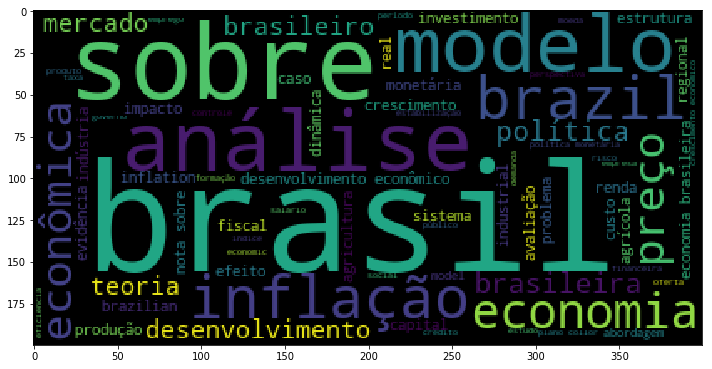

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wordcloud, interpolation='nearest')
plt.tight_layout()

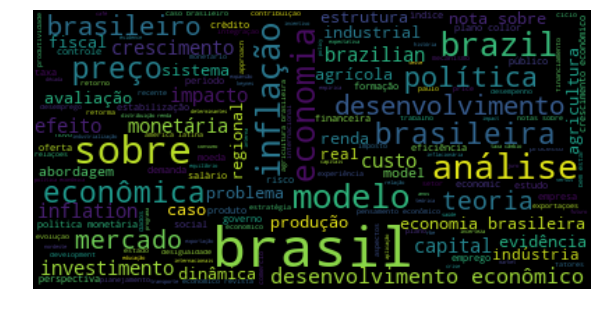

In [13]:
# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(cleaned)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [14]:
# The pil way (if you don't have matplotlib)
image = wordcloud.to_image()
image.show()

Loading second corpus

In [15]:
print('Files in the folder:')
for i, w in enumerate(onlyfiles[0:]):
    print(i+1, '--' ,w)

Files in the folder:
1 -- RobertFrost_Poetry.pdf
2 -- AldousHuxley_bravenewworld.pdf
3 -- MarcelProust_EmBuscadoTempoPerdido.pdf
4 -- ARTIGOS-RBE-COM-RESUMO.xlsx


In [16]:
raw_texts = ''
for filename in [f for f in onlyfiles if f.endswith('pdf')]:
    text = textract.process(os.path.join(corpuspath,filename)).decode('utf-8')
    print('\nTexto:\n', text[0:50])
    raw_texts += '\n'+ text


Texto:
 Classic Poetry Series

Robert Frost
- poems -

Pub

Texto:
 Brave New World
Aldous Leonard Huxley
February 6, 

Texto:
 MARCEL PROUST
EM BUSCA DO TEMPO PERDIDO

EM BUSCA 


In [17]:
print(len(raw_texts))

7342550


Cleaning and homogenizing texts:

In [18]:
cleaned_texts = raw_texts.lower()
cleaned_texts = re.sub(' +',' ', cleaned_texts) #Remove multiple spaces
cleaned_texts = re.sub(r'\n\s*\n', '\n', cleaned_texts)

In [19]:
print(len(cleaned_texts))

7339946


In [20]:
print(cleaned_texts[0:200])


classic poetry series
robert frost
- poems -
publication date:
2004
publisher:
poemhunter.com - the world's poetry archive
"in white": frost's early version of design
a dented spider like a snow dro


In [21]:
list_words = cleaned_texts.split()
list_words = [l.strip().lower() for l in list_words]
list_words = [l.strip(string.punctuation) for l in list_words]
list_words = [l for l in list_words if l not in stopwords]

freqdist = Counter(list_words)
freqdist.most_common(30)

[('é', 6892),
 ('tão', 3050),
 ('sra', 3014),
 ('bem', 2740),
 ('pois', 2667),
 ('sr', 2536),
 ('albertine', 2402),
 ('ainda', 2276),
 ('ser', 2211),
 ('tempo', 2209),
 ('mim', 2148),
 ('ter', 2045),
 ('casa', 2018),
 ('onde', 1960),
 ('havia', 1871),
 ('vida', 1771),
 ('swann', 1766),
 ('guermantes', 1729),
 ('assim', 1689),
 ('menos', 1688),
 ('sobre', 1670),
 ('vezes', 1650),
 ('dia', 1580),
 ('vez', 1549),
 ('talvez', 1479),
 ('todos', 1420),
 ('pouco', 1405),
 ('disse', 1403),
 ('pessoas', 1392),
 ('fazer', 1389)]

Finding ocurrences of an expression:

In [22]:
expression = ' life '
pos = 0 
positions = []
while pos != -1:
    position = cleaned_texts.find(expression,pos+1)
    pos = position
    positions.append(position)
positions.pop()
print('The expression is found {} times'.format(len(positions)))

The expression is found 20 times


Understanding contexts in which words occur:

In [23]:
# Pure Python
window = 8
for position in positions[0:10]:
    print(cleaned_texts[position - window:position + window + len(expression)].strip())

er young life to his.
as in my life alone,
w
ons,
and life is too m
late in life i have c
keep
the life from spi
keep
the life from spi
s that a life of self-
eet,
the life of muscl
-all his life long. th
through life without


In [24]:
# Using NLTK
tknzr = nltk.tokenize.WordPunctTokenizer()
tokens = tknzr.tokenize(cleaned_texts)
nltk_text = nltk.Text(tokens)
nltk_text.concordance(expression.lower(), width=120, lines=10)

No matches


Words that occur in similar contexts than the query expression:

In [25]:
nltk_text.similar(expression)

No matches


[Collocations](http://en.wikipedia.org/wiki/Collocation) are expressions of multiple words which commonly co-occur.  
http://www.nltk.org/howto/collocations.html  

In [26]:
nltk_text.collocations(num=100, window_size=2)

minha avó; muitas vezes; sem dúvida; que ela; além disso; que não;
para mim; que ele; minha mãe; poetry archive; cada vez; uma mulher;
desse modo; pelo menos; meu pai; por exemplo; muito bem; por causa;
uma espécie; primeira vez; dia seguinte; frost www; mais tarde; minha
tia; muito tempo; mesma forma; não podia; não era; robert frost; meus
pais; uma pessoa; outro lado; todo caso; naquele momento; nem sequer;
que lhe; alguma coisa; pelo contrário; mesmo tempo; coisa alguma; tal
modo; ter sido; seus olhos; uma vez; não sei; modo algum; pela
primeira; algum tempo; visto que; por isso; sua vida; tudo isso; não
tinha; num tom; meu quarto; não que; até então; pessoas que; seu
rosto; com uma; das pessoas; alta sociedade; teria sido; dos verdurin;
alguns dias; aos olhos; todo mundo; mim mesmo; ainda mais; meu tio;
passo que; uma certa; meu caro; aos poucos; victor hugo; que nos;
creio que; nós mesmos; por uma; assim como; mas também; dos outros;
meu avô; por fim; ela não; mau humor; outra coi

Below we are using [Pointwise Mutual Information](http://en.wikipedia.org/wiki/Pointwise_mutual_information).

In [27]:
max_items = 30
freq_min_b = 10
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder2 = nltk.collocations.BigramCollocationFinder.from_words(nltk_text)
finder2.apply_word_filter(lambda w: w in string.punctuation)
finder2.apply_freq_filter(freq_min_b)
for a, b in finder2.nbest(bigram_measures.pmi, max_items):
    print(a, b)

sarah bernhardt
fernando py
1 °
george sand
mustapha mond
vossa senhoria
victor hugo
lanterna mágica
synthetic music
jesus cristo
brave new
du boulbon
luís xiv
século xix
marcel proust
helmholtz watson
vossa alteza
século xviii
des laumes
século xvii
le champi
françoís le
frost www
poetry archive
greater being
condessa molé
henry foster
etc .,
rei teodósio
reunião noturna


In [28]:
for a, b in (finder2.above_score(bigram_measures.raw_freq, 1000.0 / len(list(nltk.bigrams(tokens))))):
        print(a, b)

que o
o que
que não
que a
de um
em que
de uma
e que
que eu
que se
de que
a sra
que ela
o sr
que me
de guermantes
que ele
e a
do que
com a
não se
de charlus
de sua
com o
o seu
e o
e de
como se


In [29]:
max_items = 30
freq_min_t = 6
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder3 = nltk.collocations.TrigramCollocationFinder.from_words(nltk_text)
finder3.apply_word_filter(lambda w: w in string.punctuation)
finder3.apply_ngram_filter(lambda w1, w2, w3:  w1 in ['da', 'de', 'das'])
finder3.apply_freq_filter(freq_min_t)
for a, b, c in finder3.nbest(trigram_measures.pmi, max_items):
    print(a, b, c)

bel et bien
des deux mondes
revue des deux
françoís le champi
better than mending
brave new world
ending is better
snarled and rattled
shrugged his shoulders
doutor du boulbon
said mustapha mond
half an hour
robert frost www
the assistant predestinator
dia 1 °
years ’ war
s poetry archive
encarregada das duchas
três quartas partes
trinta mil francos
the deputy sub
alameda das acácias
nine years ’
shook his head
princesa des laumes
príncipe des laumes
belongs to every
every one else
crepe da china
shook her head


In [30]:
for a, b, c in finder3.above_score(trigram_measures.raw_freq,100.0 / len(list(nltk.trigrams(tokens)))):
        print (a, b, c)

momento em que
tudo o que
uma espécie de
que o sr
que a sra
ao mesmo tempo
dia em que
que eu não
a impressão de
a fim de
que não se
em vez de
no momento em
ao passo que
em que a
que ela não
na casa da
a idéia de
duquesa de guermantes
em todo caso
todos os dias
casa da sra
que já não
em que o
em que eu
em que se
no dia seguinte
o que me
que o senhor
por um instante
idéia de que
o que se
ponto de vista
mais do que
mais ou menos
o nome de
e que não
por outro lado
o que eu
pela primeira vez
que ele não
s poetry archive
a princesa de
as pessoas que
que a gente
cada vez que
por um momento
don ’ t
em que ela
que não me
um pouco de
é verdade que
robert frost www
a duquesa de
a ponto de
o que não
o que é
por muito tempo
a não ser
princesa de guermantes
a um tempo
que não é
por mais que
princesa de parma
em sua casa
que ela me


In [31]:
from nltk.util import ngrams
n = 4
xgrams = ngrams(tokens, n)
xgrams_counter = Counter(xgrams)
xgrams_counter.most_common(30)

[(('o', 'sr', '.', 'de'), 1317),
 (('sr', '.', 'de', 'charlus'), 1081),
 (('a', 'sra', '.', 'de'), 936),
 (('sra', '.', 'de', 'guermantes'), 508),
 (('a', 'sra', '.', 'verdurin'), 430),
 (('da', 'sra', '.', 'de'), 392),
 (('sra', '.', 'de', 'villeparisis'), 332),
 (('do', 'sr', '.', 'de'), 307),
 (('.', 'de', 'charlus', ','), 305),
 (('que', 'o', 'sr', '.'), 270),
 (('que', 'a', 'sra', '.'), 266),
 ((',', 'a', 'sra', '.'), 249),
 ((',', 'o', 'sr', '.'), 248),
 (('de', 'saint', '-', 'loup'), 240),
 (('.', 'de', 'guermantes', ','), 235),
 (('sr', '.', 'de', 'norpois'), 228),
 (('no', 'momento', 'em', 'que'), 219),
 (('saint', '-', 'loup', ','), 217),
 (('sra', '.', 'verdurin', ','), 191),
 (('a', 'sra', '.', 'swann'), 188),
 (('.', 'a', 'sra', '.'), 186),
 (('sra', '.', 'de', 'cambremer'), 182),
 (('ao', 'sr', '.', 'de'), 172),
 (('.', 'o', 'sr', '.'), 170),
 (('.', 'além', 'disso', ','), 167),
 (('casa', 'da', 'sra', '.'), 165),
 ((',', 'no', 'entanto', ','), 164),
 ((',', 'por', 'exemp

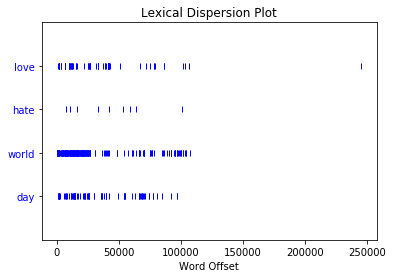

In [32]:
dispersion_words = ['love', 'hate', 'world', 'day']
nltk_text.dispersion_plot(dispersion_words)

Different ways to visualize frequent words:

In [33]:
def print_vk(lst):
    """Print a list of value/key pairs nicely formatted in key/value order."""

    # Find the longest key: remember, the list has value/key pairs, so the key
    # is element [1], not [0]
    longest_key = max([len(word) for word, count in lst])
    # Make a format string out of it
    fmt = '%'+str(longest_key)+'s -> %s'
    # Do actual printing
    for k,v in lst:
        print(fmt % (k,v))
    print('\n')

In [34]:
def plot_word_histogram(freqs, show=10, title=None):
    """Plot a histogram of word frequencies, limited to the top <show> ones.
    """
    sorted_f = sort_freqs(freqs) if isinstance(freqs, dict) else freqs

    # Don't show the tail
    if isinstance(show, int):
        # interpret as number of words to show in histogram
        show_f = sorted_f[-show:]
    else:
        # interpret as a fraction
        start = -int(round(show*len(freqs)))
        show_f = sorted_f[start:]

    # Now, extract words and counts, plot
    n_words = len(show_f)
    ind = np.arange(n_words)
    words = [i[0] for i in show_f]
    counts = [i[1] for i in show_f]

    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)

    if n_words<=20:
        # Only show bars and x labels for small histograms, they don't make
        # sense otherwise
        ax.bar(ind, counts)
        ax.set_xticks(ind)
        ax.set_xticklabels(words, rotation=45)
        fig.subplots_adjust(bottom=0.25)
    else:
        # For larger ones, do a step plot
        ax.step(ind, counts)

    # If it spans more than two decades, use a log scale
    if float(max(counts))/min(counts) > 100:
        ax.set_yscale('log')

    if title:
        ax.set_title(title)
    return ax

In [84]:
number_words=300
common_words = freqdist.most_common(number_words)
print_vk(common_words)

           é -> 6892
         tão -> 3050
         sra -> 3014
         bem -> 2740
        pois -> 2667
          sr -> 2536
   albertine -> 2402
       ainda -> 2276
         ser -> 2211
       tempo -> 2209
         mim -> 2148
         ter -> 2045
        casa -> 2018
        onde -> 1960
       havia -> 1871
        vida -> 1771
       swann -> 1766
  guermantes -> 1729
       assim -> 1689
       menos -> 1688
       sobre -> 1670
       vezes -> 1650
         dia -> 1580
         vez -> 1549
      talvez -> 1479
       todos -> 1420
       pouco -> 1405
       disse -> 1403
     pessoas -> 1392
       fazer -> 1389
       tanto -> 1383
      sempre -> 1377
       dizer -> 1360
        modo -> 1347
        nada -> 1332
      porque -> 1312
       então -> 1307
        tudo -> 1296
     charlus -> 1243
     momento -> 1202
       antes -> 1168
       outro -> 1149
      mulher -> 1147
    verdurin -> 1145
      apenas -> 1139
        todo -> 1138
      senhor -> 1131
       mesma 

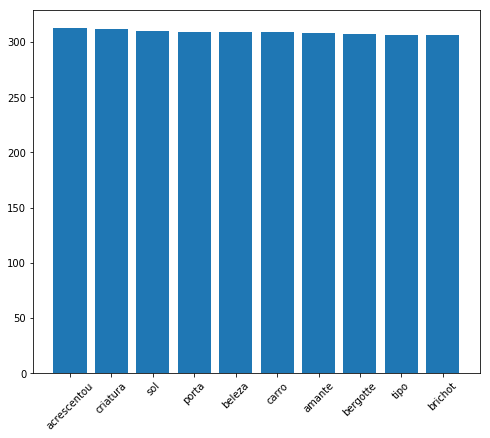

In [85]:
plot_word_histogram(common_words)

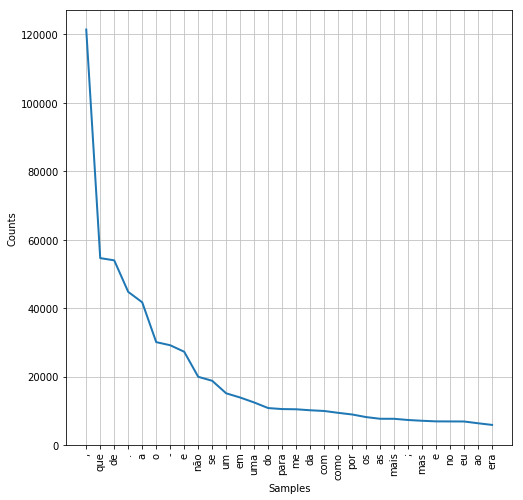

In [86]:
fd_words = nltk.FreqDist(tokens)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8)) 
fd_words.plot(30)

E a distribuição cumulativa das frequências:

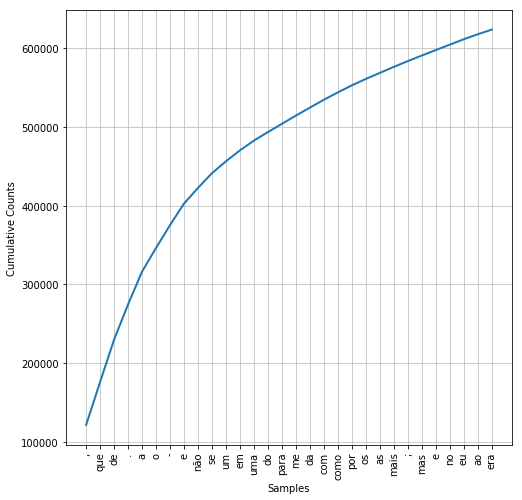

In [87]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8,8)) 
fd_words.plot(30, cumulative = True)

Vamos agora construir um grafo de palavras para estudar co-ocorrências nos textos dos feeds

Abordagem e funções aproveitadas de https://github.com/ipython/talks/blob/master/notebook/text_utils.py

In [88]:
def all_pairs(items):
    """Make all unique pairs (order doesn't matter)"""
    pairs = []
    nitems = len(items)
    for i, wi in enumerate(items):
        for j in range(i+1, nitems):
            pairs.append((wi, items[j]))
    return pairs

def co_occurrences(lines, words):
    """Return histogram of co-occurrences of words in a list of lines.

    Parameters
    ----------
    lines : list
      A list of strings considered as 'sentences' to search for co-occurrences.

    words : list
      A list of words from which all unordered pairs will be constructed and
      searched for co-occurrences.
    """
    wpairs = all_pairs(words)

    # Now build histogram of co-occurrences
    co_occur = {}
    for w1, w2 in wpairs:
        rx = re.compile('%s .*%s|%s .*%s' % (w1, w2, w2, w1))
        co_occur[w1, w2] = sum([1 for line in lines if rx.search(line)])

    return co_occur

def co_occurrences_graph(word_hist, co_occur, cutoff=0):
    """Convert a word histogram with co-occurrences to a weighted graph.
    Edges are only added if the count is above cutoff.
    """
    g = nx.Graph()
    for word, count in word_hist:
        g.add_node(word, count=count)
    for (w1, w2), count in co_occur.items():
        if count<=cutoff:
            continue
        g.add_edge(w1, w2, weight=count)
    return g

In [92]:
n_nodes = 15
pop_words = [wc[0] for wc in common_words]
co_occur = co_occurrences(list_words, pop_words)
wgraph = co_occurrences_graph(common_words, co_occur, cutoff=1)
#wsubgraph = list(nx.connected_component_subgraphs(wgraph))[1] #we have to choose the biggest con. comp.
#centrality = nx.eigenvector_centrality_numpy(wsubgraph)
#c = centrality.items()
#c.sort(key=lambda x:x[1], reverse=True)
#print('\nGraph centrality')
#for node, cent in c:
#    print("%15s: %.3g" % (node, float(cent)))

KeyboardInterrupt: 

In [ ]:
rad0 = 0.2
def rescale_arr(arr, amin, amax):
    """Rescale an array to a new range.
    Return a new array whose range of values is (amin, amax).
    Parameters
    ----------
    arr : array-like
    amin : float
      new minimum value
    amax : float
      new maximum value

    Examples
    --------
    >>> a = np.arange(5)
    >>> rescale_arr(a,3,6)
    array([ 3.  ,  3.75,  4.5 ,  5.25,  6.  ])
    """
    # old bounds
    m = arr.min()
    M = arr.max()
    # scale/offset
    s = float(amax-amin)/(M-m)
    d = amin - s*m

    # Apply clip before returning to cut off possible overflows outside the
    # intended range due to roundoff error, so that we can absolutely guarantee
    # that on output, there are no values > amax or < amin.
    return np.clip(s*arr+d,amin,amax)

def plot_graph(wgraph, pos=None, fig=None, title=None):
    """Conveniently summarize graph visually"""

    # config parameters
    edge_min_width= 3
    edge_max_width= 12
    label_font = 16
    node_font = 18
    node_alpha = 0.4
    edge_alpha = 0.55
    edge_cmap = plt.cm.Spectral

    # Create figure
    if fig is None:
        fig, ax = plt.subplots()
    else:
        ax = fig.add_subplot(111)
    fig.subplots_adjust(0,0,1)

    # Plot nodes with size according to count
    sizes = []
    degrees = []
    for n, d in wgraph.nodes_iter(data=True):
        sizes.append(d['count'])
        degrees.append(wgraph.degree(n))

    sizes = rescale_arr(np.array(sizes, dtype=float), 100, 1000)

    # Compute layout and label edges according to weight
    pos = nx.spring_layout(wgraph) if pos is None else pos
    labels = {}
    width = []
    for n1, n2, d in wgraph.edges_iter(data=True):
        w = d['weight']
        labels[n1, n2] = w
        width.append(w)

    width = rescale_arr(np.array(width, dtype=float), edge_min_width, 
                        edge_max_width)

    # Draw
    nx.draw_networkx_nodes(wgraph, pos, node_size=sizes, node_color=degrees,alpha=node_alpha)
    nx.draw_networkx_edges(wgraph, pos, width=width, edge_color=width, edge_cmap=edge_cmap, alpha=edge_alpha)
    nx.draw_networkx_edge_labels(wgraph, pos, edge_labels=labels,font_size=label_font)
    nx.draw_networkx_labels(wgraph, pos, font_size=node_font, font_weight='bold')
    if title is not None:
        ax.set_title(title, fontsize=label_font)
    ax.set_xticks([])
    ax.set_yticks([])

    # Mark centrality axes
    kw = dict(color='k', linestyle='-')
    cross = [ax.axhline(0, **kw), ax.axvline(rad0, **kw)]
    [ l.set_zorder(0) for l in cross]
    
def centrality_layout(wgraph, centrality):
    """Compute a layout based on centrality.
    """
    # Create a list of centralities, sorted by centrality value
    cent = sorted(centrality.items(), key=lambda x:float(x[1]), reverse=True)
    nodes = [c[0] for c in cent]
    cent  = np.array([float(c[1]) for c in cent])
    rad = (cent - cent[0])/(cent[-1]-cent[0])
    rad = rescale_arr(rad, rad0, 1)
    angles = np.linspace(0, 2*np.pi, len(centrality))
    layout = {}
    for n, node in enumerate(nodes):
        r = rad[n]
        th = angles[n]
        layout[node] = r*np.cos(th), r*np.sin(th)
    return layout

In [ ]:
print "Graph visualization for query:"
plot_graph(wsubgraph, centrality_layout(wsubgraph, centrality), 
           plt.figure(figsize=(12,12)), 
           title = u'Centrality and term co-occurrence graph, q="{}"'.format(query))

In [ ]:
def score_sentences(sentences, important_words):
    # Approach taken from "The Automatic Creation of Literature Abstracts" by H.P. Luhn
    CLUSTER_THRESHOLD = 5  # Distance between words to consider
    scores = []
    sentence_idx = -1
    #for s in [nltk.tokenize.word_tokenize(s) for s in sentences]:
    punktw2 = nltk.tokenize.WordPunctTokenizer() #trocando pelo punkt (melhor?)
    for s in [punktw2.tokenize(s) for s in sentences]:    
        sentence_idx += 1
        word_idx = []
        # For each word in the word list...
        for w in important_words:
            try:
                # Compute an index for where any important words occur in the sentence
                word_idx.append(s.index(w))
            except ValueError as e: # w not in this particular sentence
                pass
        word_idx.sort()
        # It is possible that some sentences may not contain any important words at all
        if len(word_idx)== 0: continue
        # Using the word index, compute clusters by using a max distance threshold
        # for any two consecutive words
        clusters = []
        cluster = [word_idx[0]]
        i = 1
        while i < len(word_idx):
            if word_idx[i] - word_idx[i - 1] < CLUSTER_THRESHOLD:
                cluster.append(word_idx[i])
            else:
                clusters.append(cluster[:])
                cluster = [word_idx[i]]
            i += 1
        clusters.append(cluster)
        # Score each cluster. The max score for any given cluster is the score 
        # for the sentence
        max_cluster_score = 0
        for c in clusters:
            significant_words_in_cluster = len(c)
            total_words_in_cluster = c[-1] - c[0] + 1
            score = 1.0 * significant_words_in_cluster \
                * significant_words_in_cluster / total_words_in_cluster
            if score > max_cluster_score:
                max_cluster_score = score
        scores.append((sentence_idx, score))
    return scores

In [ ]:
def summarize(txt):
    N = 100  # Number of words to consider
    punkts = nltk.tokenize.PunktSentenceTokenizer() #trocando pelo punkt (melhor?)
    punktw = nltk.tokenize.WordPunctTokenizer() #trocando pelo punkt (melhor?)
    #sentences = [s for s in nltk.tokenize.sent_tokenize(txt)]
    sentences = [s for s in punkts.tokenize(txt)]
    normalized_sentences = [s.lower() for s in sentences]
    words = [w.lower() for sentence in normalized_sentences for w in punktw.tokenize(sentence)]
    fdist = nltk.FreqDist(words)
    top_n_words = [w[0] for w in fdist.items() if w[0] not in stopwords][:N]
    scored_sentences = score_sentences(normalized_sentences, top_n_words)
    return sentences, top_n_words, scored_sentences

In [ ]:
sentences, top_n_words, scored_sentences = summarize(text0)
print(top_n_words)

In [ ]:
# First approach:
# Filter out non-significant sentences by using the average score plus a
# fraction of the std dev as a filter
avg = np.mean([s[1] for s in scored_sentences])
std = np.std([s[1] for s in scored_sentences])
mean_scored = [(sent_idx, score) for (sent_idx, score) in scored_sentences if score > avg + 0.5 * std]
mean_scored_summary=[sentences[idx] for (idx, score) in mean_scored]
mean_scored_summary = list(set(mean_scored_summary))

for s in mean_scored_summary[0:10]:
    print(s, '\n')

In [ ]:
# Second Approach: 
# Return only the top N ranked sentences
TOP_SENTENCES = 10  # Number of sentences to choose on "top n"
top_n_scored = sorted(scored_sentences, key=lambda s: s[1])[-TOP_SENTENCES:]
top_n_scored = sorted(top_n_scored, key=lambda s: s[0])
top_n_summary=[sentences[idx] for (idx, score) in top_n_scored]
top_n_summary = list(set(top_n_summary))

for s in top_n_summary[0:10]:
    print(s, '\n')

#### [Goose](https://github.com/goose3/goose3)

Extracting text from html pages  

In [ ]:
from goose3 import Goose

url = 'http://edition.cnn.com/2012/02/22/world/europe/uk-occupy-london/index.html?hpt=ieu_c2'
g = Goose(Goose({'use_meta_language': False, 'target_language':'en', 'parser_class':'lxml'}))

article = g.extract(url=url)

In [ ]:
article.title

In [ ]:
article.meta_description

In [ ]:
article.cleaned_text[:150]

In [ ]:
article.top_image.src

#### [Textblob](http://textblob.readthedocs.io/en/dev/)

https://www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob/

Installing:  

!sudo pip3 install -U textblob  
!python -m textblob.download_corpora

In [ ]:
from textblob import TextBlob
from textblob import Word

text = '''
The titular threat of The Blob has always struck me as the ultimate movie
monster: an insatiably hungry, amoeba-like mass able to penetrate
virtually any safeguard, capable of--as a doomed doctor chillingly
describes it--"assimilating flesh on contact.
Snide comparisons to gelatin be damned, it's a concept with the most
devastating of potential consequences, not unlike the grey goo scenario
proposed by technological theorists fearful of
artificial intelligence run rampant.
'''

text_pt = '''
Com uma abordagem inédita, o curso de Mestrado em Modelagem Matemática 
integra à Matemática Aplicada o corpo de conhecimentos das Ciências da 
Computação e da Informação, com contextos de aplicações das ciências 
sociais, econômicas, biológicas e da saúde. O curso possibilita ao 
mestrando desenvolver a capacidade de analisar cenários e dar suporte 
à tomada de decisões em situações de uso intensivo de dados e informações, 
além de ter o objetivo de formar excelentes pesquisadores na área.
'''

In [ ]:
blob = TextBlob(text)
blob_pt = TextBlob(text_pt)

In [ ]:
blob.sentences

In [ ]:
blob_pt.sentences

In [ ]:
blob.sentences[1].words

Functions applied to the Word object:  

In [ ]:
blob.sentences[1].words.singularize()

In [ ]:
w = Word('Platform')
w.pluralize()

Lemmatization  

In [ ]:
w = Word('running')
w.lemmatize("v") ## v here represents verb

POS tags  

In [ ]:
blob.tags[0:10]

In [ ]:
blob_pt.tags[0:10]

Ngrams  

In [ ]:
for ngram in blob.ngrams(2):
    print(ngram)

Noun Phrase Extraction

In [ ]:
blob.noun_phrases

In [ ]:
blob_pt.noun_phrases

Sentiment Analysis  

In [ ]:
for sentence in blob.sentences:
    print(sentence.sentiment.polarity)

Translation

In [ ]:
blob.translate(to="pt")

Detecting language

In [ ]:
blob_pt.detect_language()

Spellcheck

In [ ]:
blob = TextBlob('FGV is the bist think tenk in the word!')
blob.correct()

In [ ]:
blob.words[5].spellcheck()

Text classification

In [ ]:
training = [
('Tom Holland is a terrible spiderman.','pos'),
('a terrible Javert (Russell Crowe) ruined Les Miserables for me...','pos'),
('The Dark Knight Rises is the greatest superhero movie ever!','neg'),
('Fantastic Four should have never been made.','pos'),
('Wes Anderson is my favorite director!','neg'),
('Captain America 2 is pretty awesome.','neg'),
('Let\s pretend "Batman and Robin" never happened..','pos'),
]

testing = [
('Superman was never an interesting character.','pos'),
('Fantastic Mr Fox is an awesome film!','neg'),
('Dragonball Evolution is simply terrible!!','pos')
]

In [ ]:
from textblob import classifiers
nb_classifier = classifiers.NaiveBayesClassifier(training)
dt_classifier = classifiers.DecisionTreeClassifier(training)

In [ ]:
print (nb_classifier.accuracy(testing))

In [ ]:
nb_classifier.show_informative_features(3)

In [ ]:
blob = TextBlob('the weather is terrible!', classifier=dt_classifier)
print (blob.classify())

#### Basic Polarizing Functions for Sentiment Analysis

Loading the polarized lexycom file - OpLexicon (BR)

In [ ]:
df_o = pd.read_csv(os.path.join(datapath,oplexicon), header=None, encoding='utf-8', usecols=[0,2], names=[u'palavra',u'polaridade'])
df_o.drop_duplicates(subset=[u'palavra'], keep='first', inplace=True)
df_o = df_o.set_index(u'palavra')
print(u'Corpus com {} palavras polarizadas'.format(len(df_o)))

In [ ]:
def polariza_texto(texto, df1):
    polaridades = []
    ausentes = []
    l_palavras = texto.split()
    for palavra in l_palavras:
        p = palavra.lower().strip()
        if p in df1.index:
            polaridades.append(df1.polaridade[p])
        else:
            ausentes.append(p)
    num_pal = len(l_palavras)
    num_pol = len(polaridades)
    razao_pol = num_pol/float(num_pal) if num_pal else 0.0
    polaridade = sum(polaridades)/float(num_pol) if num_pol else 0.0
    #print('Foram polarizadas {} palavras de um total de {} ({:.2%})'.format(num_pol, num_pal, razao_pol))
    #print('A polaridade mensurada do texto é de {:.3}'.format(polaridade))
    return polaridade, ausentes

In [ ]:
def polariza_counter(dicionario, df1):
    polaridades = []
    fator_div = 0
    ausentes = []
    for palavra, frequencia in dicionario.iteritems():
        p = palavra.lower().strip()
        if p in df1.index:
            polaridades.append(df1.polaridade[p] * frequencia)
            fator_div += frequencia
        else:
            ausentes.append((palavra,frequencia))
    num_pal = len(dicionario)
    num_pol = len(polaridades)
    razao_pol = num_pol/float(num_pal) if num_pal else 0.0
    polaridade = sum(polaridades)/float(fator_div)
    print('Foram polarizadas {} palavras de um total de {} ({:.2%})'.format(num_pol, num_pal, razao_pol))
    print('A polaridade mensurada do texto é de {:.3}'.format(polaridade))
    return polaridade, ausentes

Extração de palavras relevantes usando TF-IDf  
http://radimrehurek.com/gensim/models/tfidfmodel.html  
http://radimrehurek.com/gensim/tutorial.html  
http://radimrehurek.com/gensim/tut2.html  

In [ ]:
tokens_once = [key for key in freq_words.keys() if freq_words[key]==1]
texts = [[word.strip(string.punctuation) for word in document.lower().split() if word not in ignore_words]
         for document in list_raw_texts]
texts = [[word for word in text if word not in tokens_once and len(word) > 1] for text in texts]
dictionary = gensim.corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
tfidf = gensim.models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [ ]:
x = 1
for doc in corpus_tfidf:
    print(u'\nRelevant Words in Document {}:\n'.format(x))
    relev = 0
    top_w = ''
    x+=1
    for w_in_dic, tfidf_w in doc:
        if tfidf_w > relev:
            top_w = w_in_dic
            relev = tfidf_w
    if top_w != '' and relev > 0:
        print('{}\t{}'.format(dictionary[top_w], relev)) #Rever questão do UTF-8
    else:
        print('Nothing relevant')